**1.1 Chargement des données**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_solar = pd.read_csv(
    "solar2021UNLV.csv",
    index_col=0,
    parse_dates=True
)

La colonne utilisée comme index est la première colonne Date/Time (ex. 2021-01-01 00:00:00-08:00).

Justification :

Elle représente une série temporelle à pas de 1 minute.

Elle permet :

le slicing temporel (df['2021-06-01':'2021-06-02'])

le resampling (horaire, journalier, mensuel)

les analyses temporelles et visualisations

Le format datetime avec fuseau horaire est correctement interprété par Pandas grâce à parse_dates=True.

**1.2 Exploration des données**

In [5]:
df_solar.shape

(342341, 21)

In [6]:
# 10 premières lignes
df_solar.head(10)

Unnamed: 0  year  DOY  PST       dni      ghi  \
2021-01-01 00:00:00-08:00           0  2021    1    0  0.835528 -3.09367   
2021-01-01 00:01:00-08:00           0  2021    1    1  0.835529 -3.08898   
2021-01-01 00:02:00-08:00           0  2021    1    2  0.835529 -2.54994   
2021-01-01 00:03:00-08:00           0  2021    1    3  0.835530 -2.53119   
2021-01-01 00:04:00-08:00           0  2021    1    4  0.835530 -2.86868   
2021-01-01 00:05:00-08:00           0  2021    1    5  0.835530 -2.91087   
2021-01-01 00:06:00-08:00           0  2021    1    6  0.327250 -2.53119   
2021-01-01 00:07:00-08:00           0  2021    1    7  0.083553 -2.87806   
2021-01-01 00:08:00-08:00           0  2021    1    8  0.591835 -3.09368   
2021-01-01 00:09:00-08:00           0  2021    1    9  0.835531 -3.06087   

                           Global UVA [W/m^2]  Global UVE [W/m^2]  \
2021-01-01 00:00:00-08:00              -0.011                 0.0   
2021-01-01 00:01:00-08:00              -0.011                 0.0   
2021-01-01 00:02:00-08:00              -0.011                 0.0   
2021-01-01 00:03:00-08:00              -0.016                 0.0   
2021-01-01 00:04:00-08:00              -0.016                 0.0   
2021-01-01 00:05:00-08:00              -0.010                 0.0   
2021-01-01 00:06:00-08:00              -0.011                 0.0   
2021-01-01 00:07:00-08:00              -0.010                 0.0   
2021-01-01 00:08:00-08:00              -0.014                 0.0   
2021-01-01 00:09:00-08:00              -0.016                 0.0   

                           Global UVE [Index]   temp  ...  \
2021-01-01 00:00:00-08:00               0.004  10.62  ...   
2021-01-01 00:01:00-08:00               0.004  10.65  ...   
2021-01-01 00:02:00-08:00               0.004  10.61  ...   
2021-01-01 00:03:00-08:00               0.003  10.56  ...   
2021-01-01 00:04:00-08:00               0.003  10.57  ...   
2021-01-01 00:05:00-08:00               0.004  10.56  ...   
2021-01-01 00:06:00-08:00               0.004  10.47  ...   
2021-01-01 00:07:00-08:00               0.004  10.47  ...   
2021-01-01 00:08:00-08:00               0.004  10.51  ...   
2021-01-01 00:09:00-08:00               0.003  10.58  ...   

                           Avg Wind Direction @ 30ft [deg from N]  \
2021-01-01 00:00:00-08:00                                   5.202   
2021-01-01 00:01:00-08:00                                   8.640   
2021-01-01 00:02:00-08:00                                   7.555   
2021-01-01 00:03:00-08:00                                  34.190   
2021-01-01 00:04:00-08:00                                  41.970   
2021-01-01 00:05:00-08:00                                  13.700   
2021-01-01 00:06:00-08:00                                  27.540   
2021-01-01 00:07:00-08:00                                  49.940   
2021-01-01 00:08:00-08:00                                  38.450   
2021-01-01 00:09:00-08:00                                   6.056   

                           Peak Wind Speed @ 30ft [m/s]  UVSAET Temp [deg C]  \
2021-01-01 00:00:00-08:00                        10.680                24.88   
2021-01-01 00:01:00-08:00                         9.210                24.87   
2021-01-01 00:02:00-08:00                         7.644                24.81   
2021-01-01 00:03:00-08:00                         6.468                24.75   
2021-01-01 00:04:00-08:00                         7.448                24.78   
2021-01-01 00:05:00-08:00                         4.704                24.87   
2021-01-01 00:06:00-08:00                         4.508                24.88   
2021-01-01 00:07:00-08:00                         7.840                24.83   
2021-01-01 00:08:00-08:00                         8.130                24.77   
2021-01-01 00:09:00-08:00                         6.762                24.77   

                           Logger Temp [deg C]  Logger Battery [VDC]  \
2021-01-01 00:00:00-08:00                18.9

In [7]:
# 10 dernières lignes
df_solar.tail(10)

Unnamed: 0  year  DOY   PST      dni       ghi  \
2021-08-26 17:31:00-08:00           0  2021  238  1731  558.587  116.2090   
2021-08-26 17:32:00-08:00           0  2021  238  1732  551.789  112.7100   
2021-08-26 17:33:00-08:00           0  2021  238  1733  545.221  109.4310   
2021-08-26 17:34:00-08:00           0  2021  238  1734  537.826  106.2270   
2021-08-26 17:35:00-08:00           0  2021  238  1735  529.219  102.3440   
2021-08-26 17:36:00-08:00           0  2021  238  1736  521.719   98.9484   
2021-08-26 17:37:00-08:00           0  2021  238  1737  514.900   95.8382   
2021-08-26 17:38:00-08:00           0  2021  238  1738  504.979   92.3768   
2021-08-26 17:39:00-08:00           0  2021  238  1739  492.636   88.2455   
2021-08-26 17:40:00-08:00           0  2021  238  1740  476.522   83.8900   

                           Global UVA [W/m^2]  Global UVE [W/m^2]  \
2021-08-26 17:31:00-08:00               3.950               0.010   
2021-08-26 17:32:00-08:00               3.824               0.010   
2021-08-26 17:33:00-08:00               3.703               0.010   
2021-08-26 17:34:00-08:00               3.582               0.009   
2021-08-26 17:35:00-08:00               3.467               0.009   
2021-08-26 17:36:00-08:00               3.350               0.009   
2021-08-26 17:37:00-08:00               3.238               0.008   
2021-08-26 17:38:00-08:00               3.125               0.008   
2021-08-26 17:39:00-08:00               3.011               0.008   
2021-08-26 17:40:00-08:00                 NaN                 NaN   

                           Global UVE [Index]   temp  ...  \
2021-08-26 17:31:00-08:00               0.413  39.29  ...   
2021-08-26 17:32:00-08:00               0.399  39.32  ...   
2021-08-26 17:33:00-08:00               0.386  39.24  ...   
2021-08-26 17:34:00-08:00               0.373  39.11  ...   
2021-08-26 17:35:00-08:00               0.360  39.24  ...   
2021-08-26 17:36:00-08:00               0.348  39.17  ...   
2021-08-26 17:37:00-08:00               0.335  39.01  ...   
2021-08-26 17:38:00-08:00               0.323  38.91  ...   
2021-08-26 17:39:00-08:00               0.311  39.03  ...   
2021-08-26 17:40:00-08:00                 NaN    NaN  ...   

                           Avg Wind Direction @ 30ft [deg from N]  \
2021-08-26 17:31:00-08:00                                   29.49   
2021-08-26 17:32:00-08:00                                   28.08   
2021-08-26 17:33:00-08:00                                   33.71   
2021-08-26 17:34:00-08:00                                   27.96   
2021-08-26 17:35:00-08:00                                   28.16   
2021-08-26 17:36:00-08:00                                   29.02   
2021-08-26 17:37:00-08:00                                   34.07   
2021-08-26 17:38:00-08:00                                   28.93   
2021-08-26 17:39:00-08:00                                   29.55   
2021-08-26 17:40:00-08:00                                     NaN   

                           Peak Wind Speed @ 30ft [m/s]  UVSAET Temp [deg C]  \
2021-08-26 17:31:00-08:00                         5.880                25.57   
2021-08-26 17:32:00-08:00                         4.998                25.56   
2021-08-26 17:33:00-08:00                         4.410                25.56   
2021-08-26 17:34:00-08:00                         4.900                25.56   
2021-08-26 17:35:00-08:00                         5.880                25.56   
2021-08-26 17:36:00-08:00                         6.762                25.56   
2021-08-26 17:37:00-08:00                         5.488                25.56   
2021-08-26 17:38:00-08:00                         5.194                25.56   
2021-08-26 17:39:00-08:00                         5.684                25.56   
2021-08-26 17:40:00-08:00                           NaN                  NaN   

                           Logger Temp [deg C]  Logger Battery [VDC]  \
2021-08-26 17:31:00-08:00         

In [8]:
df_solar.dtypes

Unnamed: 0                                  int64
year                                        int64
DOY                                         int64
PST                                         int64
dni                                       float64
ghi                                       float64
Global UVA [W/m^2]                        float64
Global UVE [W/m^2]                        float64
Global UVE [Index]                        float64
temp                                      float64
Avg Wind Speed @ 30ft [m/s]               float64
Avg Wind Direction @ 30ft [deg from N]    float64
Peak Wind Speed @ 30ft [m/s]              float64
UVSAET Temp [deg C]                       float64
Logger Temp [deg C]                       float64
Logger Battery [VDC]                      float64
Wind Chill Temp [deg C]                   float64
dhi                                       float64
Zenith Angle [degrees]                    float64
Azimuth Angle [degrees]                   float64
Airmass                                   float64
dtype: object

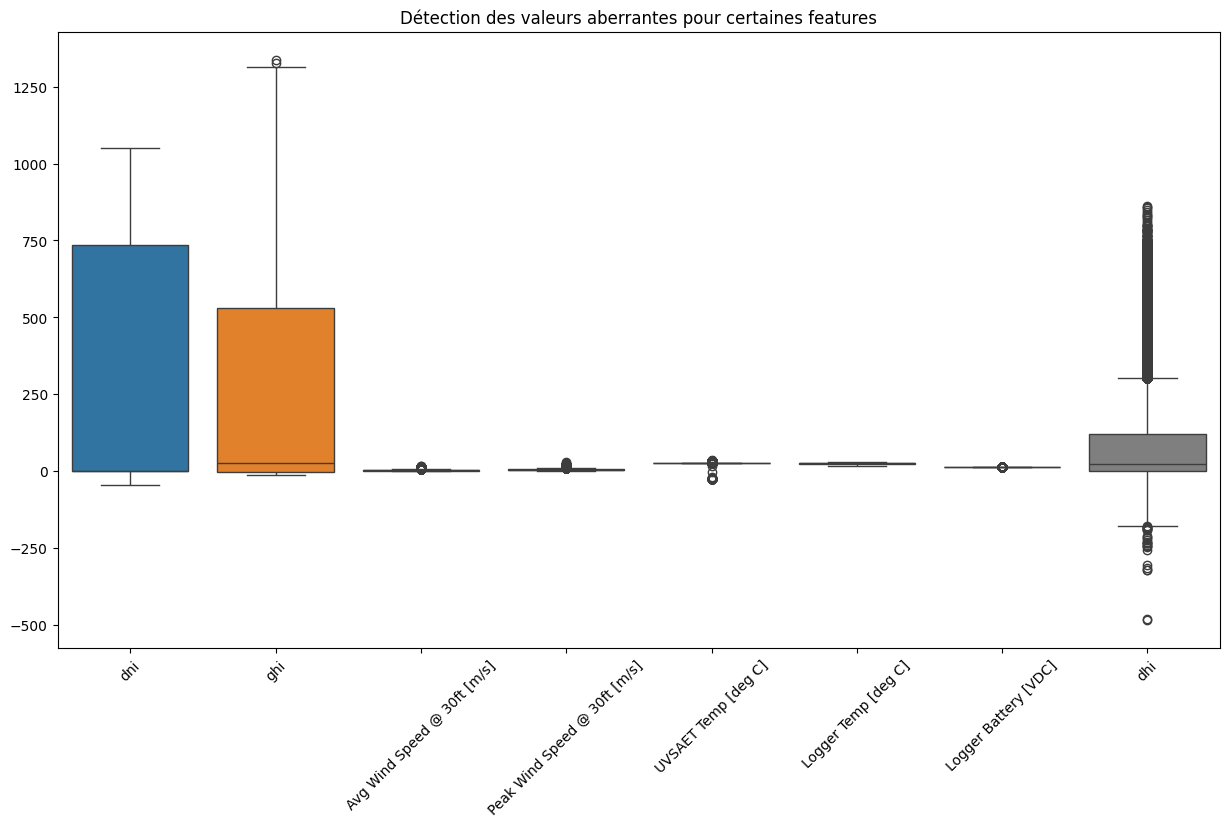

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection de quelques colonnes pour le boxplot
cols_to_check = ['dni', 'ghi',
                 'Avg Wind Speed @ 30ft [m/s]', 'Peak Wind Speed @ 30ft [m/s]',
                 'UVSAET Temp [deg C]','Logger Temp [deg C]', 'Logger Battery [VDC]','dhi']

# Création de boxplots
plt.figure(figsize=(15,8))
sns.boxplot(data=df_solar[cols_to_check])
plt.xticks(rotation=45)
plt.title("Détection des valeurs aberrantes pour certaines features")
plt.show()

Les boxplots permettent de visualiser la médiane, les quartiles et les points éloignés (outliers).

Par exemple :

dni,dhi et ghi peuvent contenir des valeurs négatives ou très élevées en cas d’erreur de capteur.

Wind Speed et Peak Wind Speed peuvent présenter des pics exceptionnels.

Logger Battery peut avoir des valeurs très faibles ou fixes indiquant des anomalies de mesure.

**1.3 Manipulation des données**

In [4]:
# Supprimer la colonne non souhaitée
df_ref = df_solar.drop(columns=['Unnamed: 0','year'])

# Vérification
df_ref.head(3)

DOY  PST       dni      ghi  Global UVA [W/m^2]  \
2021-01-01 00:00:00-08:00    1    0  0.835528 -3.09367              -0.011   
2021-01-01 00:01:00-08:00    1    1  0.835529 -3.08898              -0.011   
2021-01-01 00:02:00-08:00    1    2  0.835529 -2.54994              -0.011   

                           Global UVE [W/m^2]  Global UVE [Index]   temp  \
2021-01-01 00:00:00-08:00                 0.0               0.004  10.62   
2021-01-01 00:01:00-08:00                 0.0               0.004  10.65   
2021-01-01 00:02:00-08:00                 0.0               0.004  10.61   

                           Avg Wind Speed @ 30ft [m/s]  \
2021-01-01 00:00:00-08:00                        7.077   
2021-01-01 00:01:00-08:00                        5.321   
2021-01-01 00:02:00-08:00                        4.655   

                           Avg Wind Direction @ 30ft [deg from N]  \
2021-01-01 00:00:00-08:00                                   5.202   
2021-01-01 00:01:00-08:00                                   8.640   
2021-01-01 00:02:00-08:00                                   7.555   

                           Peak Wind Speed @ 30ft [m/s]  UVSAET Temp [deg C]  \
2021-01-01 00:00:00-08:00                        10.680                24.88   
2021-01-01 00:01:00-08:00                         9.210                24.87   
2021-01-01 00:02:00-08:00                         7.644                24.81   

                           Logger Temp [deg C]  Logger Battery [VDC]  \
2021-01-01 00:00:00-08:00                18.96                 13.35   
2021-01-01 00:01:00-08:00                18.96                 13.35   
2021-01-01 00:02:00-08:00                18.96                 13.35   

                           Wind Chill Temp [deg C]  dhi  \
2021-01-01 00:00:00-08:00                    7.804  0.0   
2021-01-01 00:01:00-08:00                    8.390  0.0   
2021-01-01 00:02:00-08:00                    8.550  0.0   

                           Zenith Angle [degrees]  Azimuth Angle [degrees]  \
2021-01-01 00:00:00-08:00                 166.453                  15.9978   
2021-01-01 00:01:00-08:00                 166.396                  16.9448   
2021-01-01 00:02:00-08:00                 166.335                  17.8867   

                           Airmass  
2021-01-01 00:00:00-08:00  -7999.0  
2021-01-01 00:01:00-08:00  -7999.0  
2021-01-01 00:02:00-08:00  -7999.0

In [15]:
df_ref.isna().sum()

DOY                                       0
PST                                       0
dni                                       0
ghi                                       0
Global UVA [W/m^2]                        1
Global UVE [W/m^2]                        1
Global UVE [Index]                        1
temp                                      1
Avg Wind Speed @ 30ft [m/s]               1
Avg Wind Direction @ 30ft [deg from N]    1
Peak Wind Speed @ 30ft [m/s]              1
UVSAET Temp [deg C]                       1
Logger Temp [deg C]                       1
Logger Battery [VDC]                      1
Wind Chill Temp [deg C]                   1
dhi                                       1
Zenith Angle [degrees]                    1
Azimuth Angle [degrees]                   1
Airmass                                   1
dtype: int64

In [5]:
df_ref = df_ref.dropna()

# Vérification
df_ref.isna().sum()

DOY                                       0
PST                                       0
dni                                       0
ghi                                       0
Global UVA [W/m^2]                        0
Global UVE [W/m^2]                        0
Global UVE [Index]                        0
temp                                      0
Avg Wind Speed @ 30ft [m/s]               0
Avg Wind Direction @ 30ft [deg from N]    0
Peak Wind Speed @ 30ft [m/s]              0
UVSAET Temp [deg C]                       0
Logger Temp [deg C]                       0
Logger Battery [VDC]                      0
Wind Chill Temp [deg C]                   0
dhi                                       0
Zenith Angle [degrees]                    0
Azimuth Angle [degrees]                   0
Airmass                                   0
dtype: int64

In [17]:
df_ref.duplicated().sum()

np.int64(0)

In [18]:
# Supprimer les doublons
df_ref = df_ref.drop_duplicates()

# Vérification
df_ref.duplicated().sum()

np.int64(0)

**1.4 Analyse des données**

In [19]:
# Valeur maximale
ghi_max = df_ref['ghi'].max()

# Date correspondante
date_max = df_ref['ghi'].idxmax()

ghi_max, date_max

(1337.17, Timestamp('2021-04-27 12:20:00-0800', tz='UTC-08:00'))

In [20]:
ghi_mean = df_ref['ghi'].mean()
ghi_mean

np.float64(263.61179391761704)

In [22]:
ghi_monthly = df_ref['ghi'].resample('ME').mean()
ghi_monthly

2021-01-31 00:00:00-08:00    125.318109
2021-02-28 00:00:00-08:00    186.490682
2021-03-31 00:00:00-08:00    232.542912
2021-04-30 00:00:00-08:00    303.898543
2021-05-31 00:00:00-08:00    336.267422
2021-06-30 00:00:00-08:00    322.771522
2021-07-31 00:00:00-08:00    295.872890
2021-08-31 00:00:00-08:00    309.221558
Freq: ME, Name: ghi, dtype: float64

In [23]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    else:
        return 'Automne'

ghi_season = df_ref['ghi'].groupby(df_ref.index.month.map(get_season)).mean()
ghi_season

Hiver        154.349160
Printemps    290.761703
Été          309.137282
Name: ghi, dtype: float64

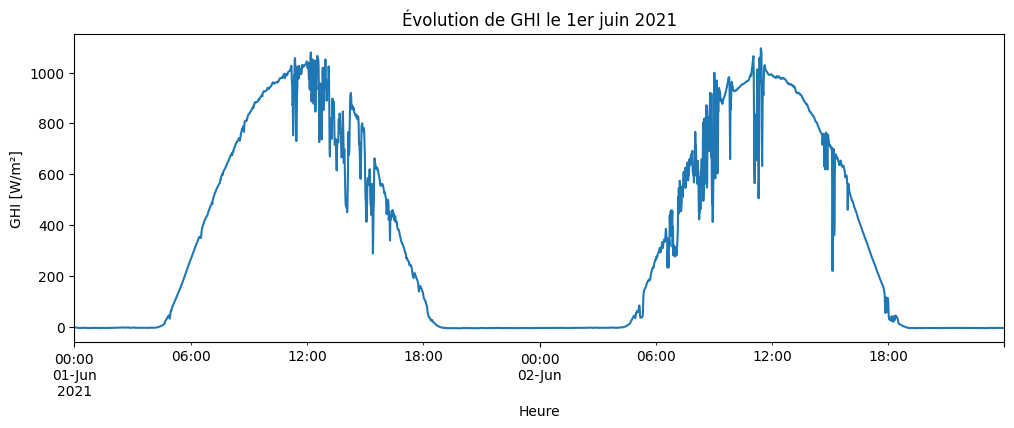

In [25]:
import matplotlib.pyplot as plt

# Exemple pour le 1er juin 2021
ghi_day = df_ref['2021-06-01':'2021-06-02']['ghi']
plt.figure(figsize=(12,4))
ghi_day.plot()
plt.title("Évolution de GHI le 1er juin 2021")
plt.xlabel("Heure")
plt.ylabel("GHI [W/m²]")
plt.show()

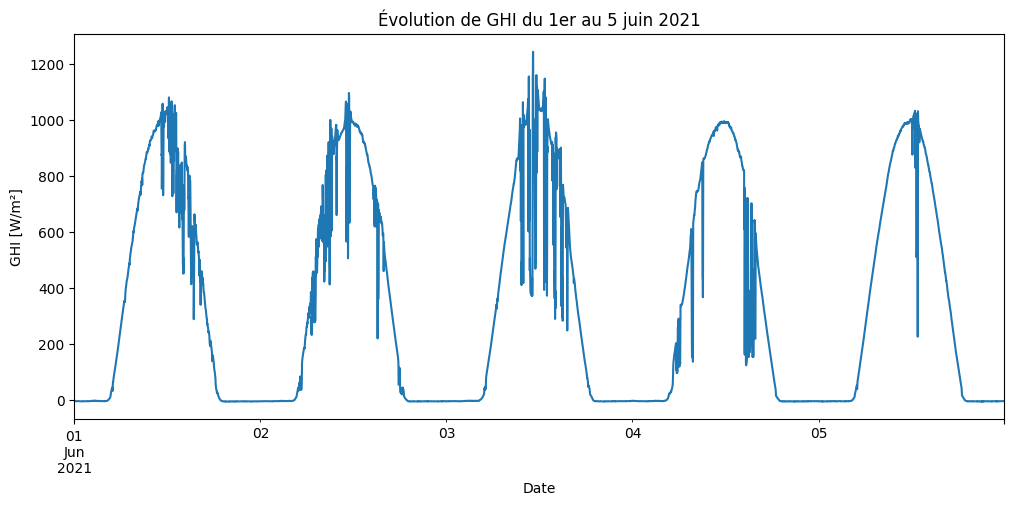

In [26]:
ghi_5days = df_ref['2021-06-01':'2021-06-05']['ghi']

plt.figure(figsize=(12,5))
ghi_5days.plot()
plt.title("Évolution de GHI du 1er au 5 juin 2021")
plt.xlabel("Date")
plt.ylabel("GHI [W/m²]")
plt.show()

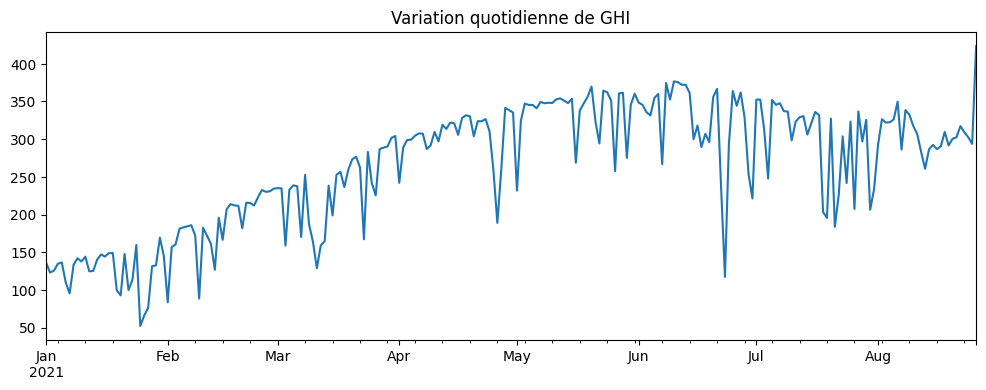

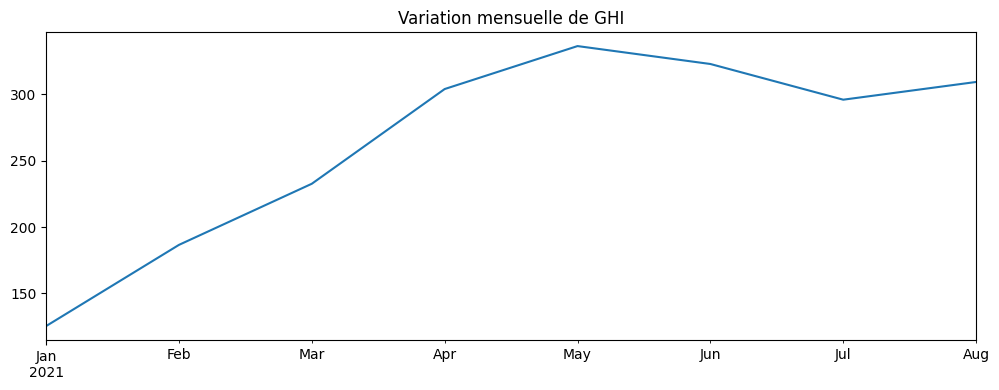

In [27]:
# Par jour
ghi_daily = df_ref['ghi'].resample('d').mean()
ghi_daily.plot(figsize=(12,4), title="Variation quotidienne de GHI")
plt.show()

# Par mois
ghi_monthly = df_ref['ghi'].resample('ME').mean()
ghi_monthly.plot(figsize=(12,4), title="Variation mensuelle de GHI")
plt.show()

Comme l’index est de type DatetimeIndex, resample peut directement regrouper par jour (d) ou mois (ME) sans avoir besoin de créer de nouvelles colonnes jour ou mois.

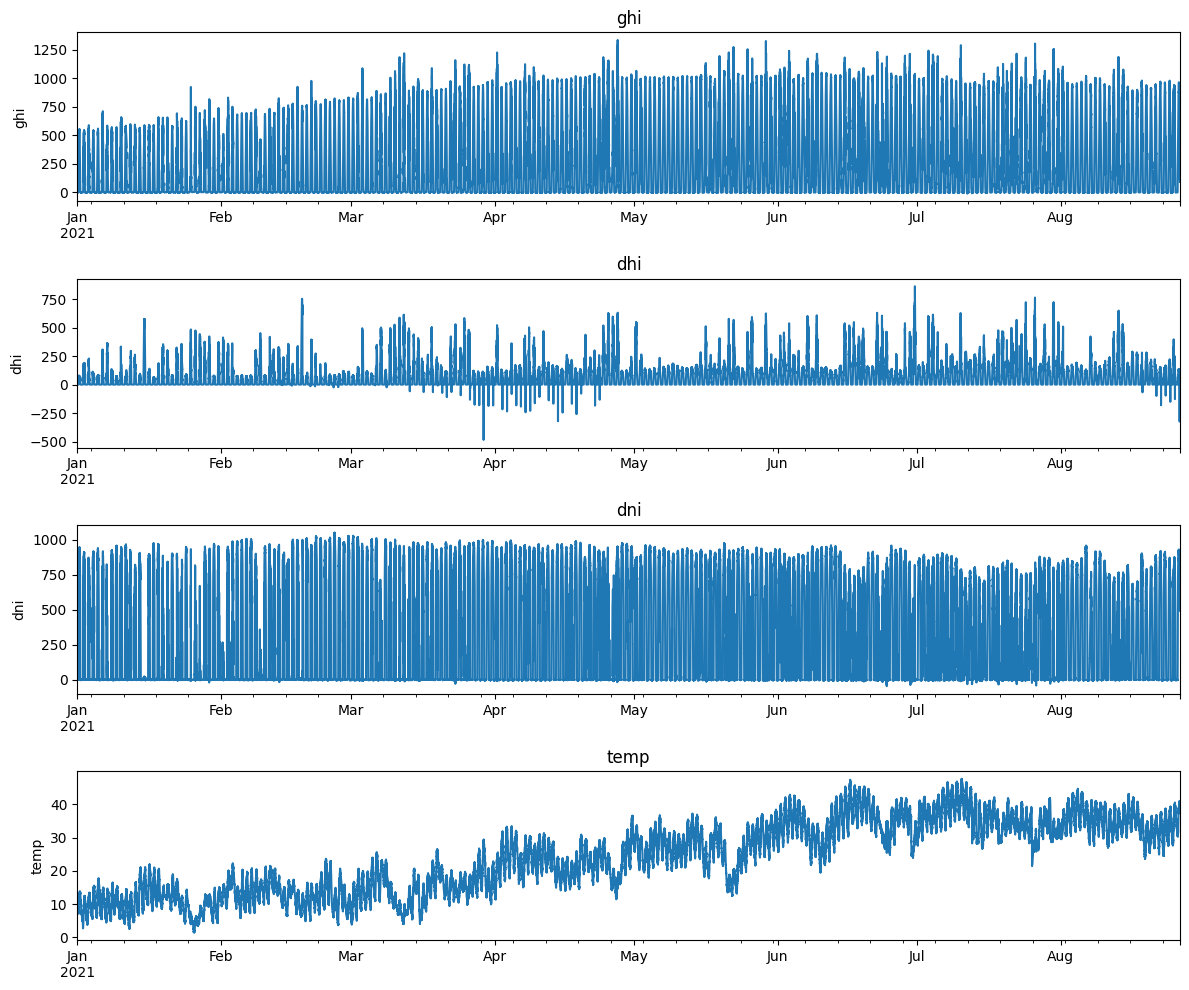

In [28]:
variables = ['ghi', 'dhi', 'dni', 'temp']

plt.figure(figsize=(12,10))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 1, i)
    df_ref[var].plot()
    plt.title(var)
    plt.ylabel(var)
    plt.xlabel("")

plt.tight_layout()
plt.show()

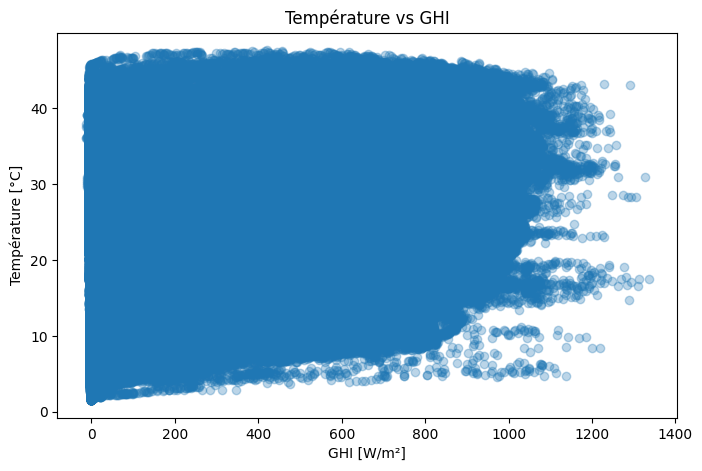

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df_ref['ghi'], df_ref['temp'], alpha=0.3)
plt.title("Température vs GHI")
plt.xlabel("GHI [W/m²]")
plt.ylabel("Température [°C]")
plt.show()

On s’attend à voir une corrélation positive : quand GHI augmente (plus de rayonnement solaire), la température tend à augmenter.

La dispersion peut montrer que d’autres facteurs (vent, nuages, heure de la journée) influencent la température.

In [6]:
corr = df_ref.corr()

# Affichage de la matrice
corr

DOY       PST       dni  \
DOY                                     1.000000 -0.007500  0.101429   
PST                                    -0.007500  1.000000 -0.015427   
dni                                     0.101429 -0.015427  1.000000   
ghi                                     0.173550 -0.013710  0.880273   
Global UVA [W/m^2]                      0.169159 -0.008712  0.869896   
Global UVE [W/m^2]                      0.190813 -0.008110  0.832176   
Global UVE [Index]                      0.190960 -0.008046  0.832017   
temp                                    0.341484  0.360944  0.330137   
Avg Wind Speed @ 30ft [m/s]             0.274902  0.015206  0.137856   
Avg Wind Direction @ 30ft [deg from N] -0.093432  0.052202  0.187034   
Peak Wind Speed @ 30ft [m/s]            0.282447  0.016291  0.148484   
UVSAET Temp [deg C]                     0.059080 -0.049829  0.175055   
Logger Temp [deg C]                     0.259561  0.435604 -0.005120   
Logger Battery [VDC]                   -0.264840 -0.434348  0.042711   
Wind Chill Temp [deg C]                 0.304724  0.359367  0.320116   
dhi                                     0.097118 -0.010454  0.325771   
Zenith Angle [degrees]                 -0.166102  0.028230 -0.710349   
Azimuth Angle [degrees]                -0.007973  0.954411 -0.003199   
Airmass                                 0.069635 -0.017441  0.667342   

                                             ghi  Global UVA [W/m^2]  \
DOY                                     0.173550            0.169159   
PST                                    -0.013710           -0.008712   
dni                                     0.880273            0.869896   
ghi                                     1.000000            0.996514   
Global UVA [W/m^2]                      0.996514            1.000000   
Global UVE [W/m^2]                      0.989122            0.991418   
Global UVE [Index]                      0.989075            0.991359   
temp                                    0.357313            0.367507   
Avg Wind Speed @ 30ft [m/s]             0.186834            0.187021   
Avg Wind Direction @ 30ft [deg from N]  0.190840            0.197258   
Peak Wind Speed @ 30ft [m/s]            0.197433            0.197730   
UVSAET Temp [deg C]                     0.200802            0.199495   
Logger Temp [deg C]                     0.036073            0.046503   
Logger Battery [VDC]                    0.009526           -0.000179   
Wind Chill Temp [deg C]                 0.340707            0.350958   
dhi                                     0.642546            0.655254   
Zenith Angle [degrees]                 -0.804188           -0.813724   
Azimuth Angle [degrees]                -0.000279            0.006412   
Airmass                                 0.691267            0.699621   

                                        Global UVE [W/m^2]  \
DOY                                               0.190813   
PST                                              -0.008110   
dni                                               0.832176   
ghi                                               0.989122   
Global UVA [W/m^2]                                0.991418   
Global UVE [W/m^2]                                1.000000   
Global UVE [Index]                                0.999988   
temp                                              0.371374   
Avg Wind Speed @ 30ft [m/s]                       0.180370   
Avg Wind Direction @ 30ft [deg from N]            0.189122   
Peak Wind Speed @ 30ft [m/s]                      0.190950   
UVSAET Temp [deg C]                               0.202094   
Logger Temp [deg C]                               0.059108   
Logger Battery [VDC]                             -0.013950   
Wind Chill Temp [deg C]                           0.356037   
dhi                                               0.642050   
Zenith Angle [degrees]                           -0.787645   
Azimuth Angle [degrees]                        

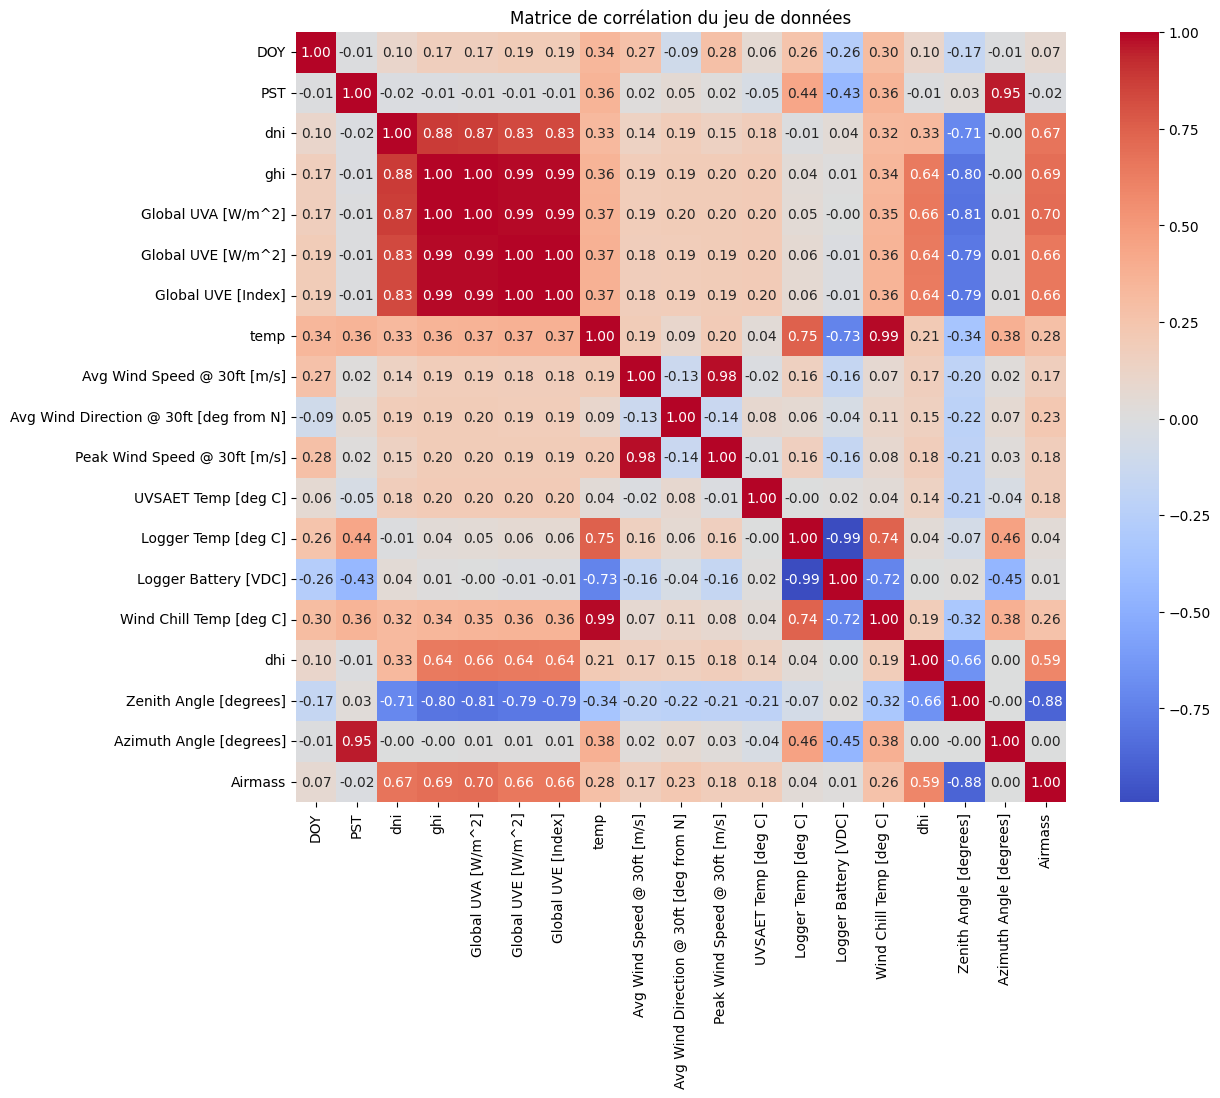

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation du jeu de données")
plt.show()

**Pourquoi la diagonale principale de la matrice de corrélation est-elle remplie de 1 ?**

La diagonale principale correspond à la corrélation de chaque variable avec elle-même.

Or, la corrélation de Pearson entre une variable
𝑋 et elle-même est toujours égale à 1, car : la relation est parfaitement linéaire et positive,

chaque variation de 𝑋 est exactement expliquée par 𝑋 lui-même.

Mathématiquement :

corr (𝑋,𝑋) = cov(𝑋,𝑋)/𝜎𝑋⋅𝜎𝑋=1

C’est pour cette raison que toutes les valeurs sur la diagonale sont égales à 1.

**Pourquoi la matrice de corrélation est-elle symétrique ?**

La matrice de corrélation est symétrique par rapport à la diagonale principale, car la corrélation entre deux variables est commutative :

corr(𝑋,𝑌)=corr(𝑌,𝑋)

Autrement dit :

la corrélation entre GHI et température est exactement la même que celle entre température et GHI,

chaque valeur située sous la diagonale a donc un équivalent identique au-dessus.

Cette propriété découle directement de la définition mathématique de la covariance et du coefficient de corrélation de Pearson.

**Que signifie une corrélation proche de zéro ?**

Une corrélation proche de zéro signifie qu’il n’existe pas de relation linéaire significative entre les deux variables.

Cela implique que :

lorsque l’une des variables augmente ou diminue, l’autre ne suit pas de tendance linéaire claire,

les variations de l’une n’expliquent pas celles de l’autre dans un cadre linéaire.

Important :
Une corrélation proche de zéro n’implique pas nécessairement une absence totale de relation.
Il peut exister :

une relation non linéaire,

une relation conditionnelle dépendant d’une autre variable (heure, saison, météo, etc.).

**Quelles sont les variables présentant les corrélations les plus fortes ?**


Dans ce type de dataset solaire, les corrélations les plus fortes sont généralement observées entre :

Corrélations positives fortes

GHI ↔ DNI

GHI ↔ DHI

DNI ↔ DHI

Loggers<>

Ces variables décrivent différentes composantes du rayonnement solaire, ce qui explique leur forte dépendance physique.


Corrélations faibles ou proches de zéro

Variables solaires ↔ direction du vent

Variables solaires ↔ batterie du logger

Ces variables sont physiquement peu liées au rayonnement solaire direct.

In [10]:
corr_ghi = df_ref.corr()['ghi'].sort_values(ascending=False)

corr_ghi

ghi                                       1.000000
Global UVA [W/m^2]                        0.996514
Global UVE [W/m^2]                        0.989122
Global UVE [Index]                        0.989075
dni                                       0.880273
Airmass                                   0.691267
dhi                                       0.642546
temp                                      0.357313
Wind Chill Temp [deg C]                   0.340707
UVSAET Temp [deg C]                       0.200802
Peak Wind Speed @ 30ft [m/s]              0.197433
Avg Wind Direction @ 30ft [deg from N]    0.190840
Avg Wind Speed @ 30ft [m/s]               0.186834
DOY                                       0.173550
Logger Temp [deg C]                       0.036073
Logger Battery [VDC]                      0.009526
Azimuth Angle [degrees]                  -0.000279
PST                                      -0.013710
Zenith Angle [degrees]                   -0.804188
Name: ghi, dtype: float64

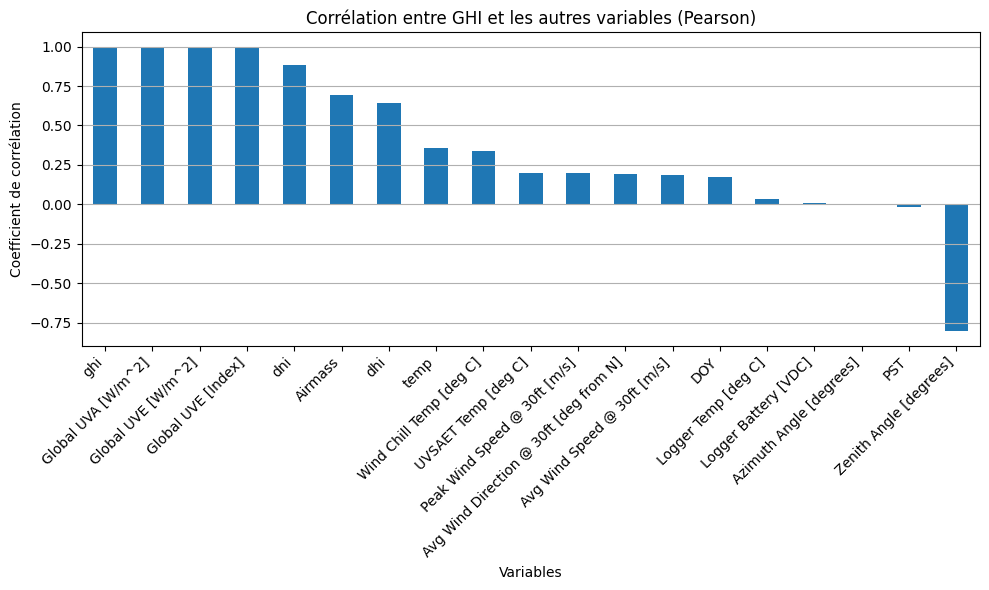

In [11]:
plt.figure(figsize=(10,6))
corr_ghi.plot(kind='bar')
plt.title("Corrélation entre GHI et les autres variables (Pearson)")
plt.ylabel("Coefficient de corrélation")
plt.xlabel("Variables")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Variables les plus fortement corrélées avec GHI**

(typiquement |corr| ≥ 0.6)

Global U*

DNI (Direct Normal Irradiance)

DHI (Diffuse Horizontal Irradiance)

Zenith Angle [degrees] (corrélation négative forte)


Ces variables sont physiquement liées au rayonnement solaire, ce qui explique leurs fortes corrélations.

**Variables faiblement corrélées à GHI**

Avg Wind Direction @ 30ft [deg from N]

Avg Wind Speed @ 30ft [m/s]

Peak Wind Speed @ 30ft [m/s]

Logger Battery [VDC]

Logger Temp [deg C] (selon les périodes)

 Ces variables ne sont pas directement liées à l’intensité du rayonnement solaire global.

In [12]:
corr_ghi_kendall = df_ref.corr(method='kendall')['ghi'].sort_values(ascending=False)
corr_ghi_kendall

ghi                                       1.000000
Global UVE [W/m^2]                        0.820448
Global UVA [W/m^2]                        0.734853
Global UVE [Index]                        0.729499
dni                                       0.695508
dhi                                       0.685390
Airmass                                   0.345560
UVSAET Temp [deg C]                       0.200440
Peak Wind Speed @ 30ft [m/s]              0.171573
Avg Wind Speed @ 30ft [m/s]               0.147630
Avg Wind Direction @ 30ft [deg from N]    0.146020
temp                                      0.144573
Wind Chill Temp [deg C]                   0.130349
DOY                                       0.055445
Logger Battery [VDC]                      0.045256
Logger Temp [deg C]                      -0.012517
Azimuth Angle [degrees]                  -0.020609
PST                                      -0.030274
Zenith Angle [degrees]                   -0.657034
Name: ghi, dtype: float64

In [13]:
corr_ghi_spearman = df_ref.corr(method='spearman')['ghi'].sort_values(ascending=False)
corr_ghi_spearman

ghi                                       1.000000
Global UVE [W/m^2]                        0.916737
Global UVA [W/m^2]                        0.866327
dhi                                       0.862657
dni                                       0.861226
Global UVE [Index]                        0.855365
Airmass                                   0.652430
UVSAET Temp [deg C]                       0.264332
Peak Wind Speed @ 30ft [m/s]              0.253266
temp                                      0.225776
Avg Wind Direction @ 30ft [deg from N]    0.223441
Avg Wind Speed @ 30ft [m/s]               0.219178
Wind Chill Temp [deg C]                   0.205290
DOY                                       0.081316
Logger Battery [VDC]                      0.064225
Logger Temp [deg C]                      -0.016336
Azimuth Angle [degrees]                  -0.065692
PST                                      -0.082700
Zenith Angle [degrees]                   -0.828929
Name: ghi, dtype: float64

**Comparaison des méthodes Pearson, Spearman et Kendall**

Pearson
--
Mesure la relation linéaire.

Sensible aux valeurs aberrantes.

Donne les coefficients les plus élevés pour GHI–DNI–DHI et global U*.

Spearman
--
Mesure une relation monotone (linéaire ou non).

Basée sur les rangs → plus robuste aux outliers.

Confirme les fortes relations solaires même si la relation n’est pas strictement linéaire.

Kendall
--
Mesure la concordance entre les rangs.

Plus conservatrice que Spearman.

Donne des coefficients plus faibles mais plus robustes statistiquement.

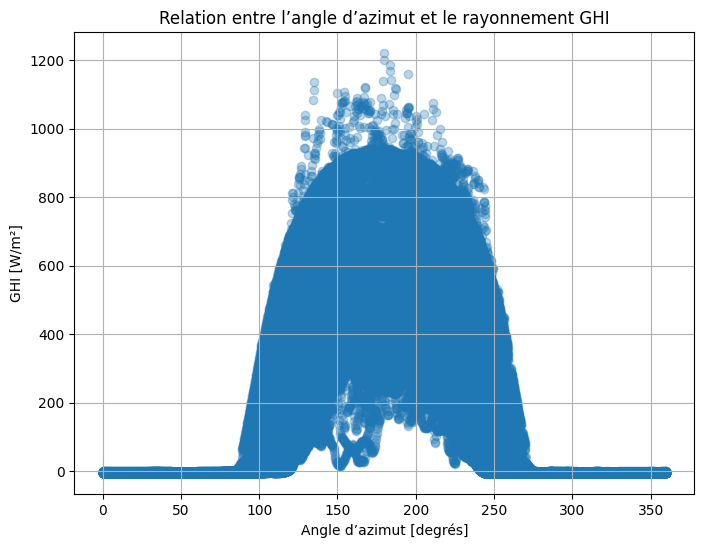

In [14]:

plt.figure(figsize=(8,6))
plt.scatter(
    df_ref['Azimuth Angle [degrees]'],
    df_ref['ghi'],
    alpha=0.3
)
plt.xlabel("Angle d’azimut [degrés]")
plt.ylabel("GHI [W/m²]")
plt.title("Relation entre l’angle d’azimut et le rayonnement GHI")
plt.grid(True)
plt.show()

**Observation du graphique**

Oui, on observe une structure claire et non aléatoire dans ce nuage de points.

Motif observé

Le graphique présente une forme en cloche / arc :

GHI est faible pour certains angles d’azimut (lever et coucher du soleil),

GHI atteint ses valeurs maximales pour des angles d’azimut correspondant à la position du soleil proche du sud solaire,

puis GHI diminue à nouveau lorsque l’azimut s’éloigne de cette position.

**Justification physique**

Ce comportement s’explique par la trajectoire apparente du soleil :

Lorsque le soleil est bas sur l’horizon (azimut est ou ouest), le rayonnement incident est faible :

angle d’incidence défavorable,

parcours plus long dans l’atmosphère.

Lorsque le soleil est plus haut dans le ciel, autour du midi solaire :

l’angle d’incidence est plus favorable,

le rayonnement reçu (GHI) est maximal.

La relation entre l’angle d’azimut et GHI est donc :

non linéaire,

structurée,

dictée par la géométrie solaire et le cycle journalier.

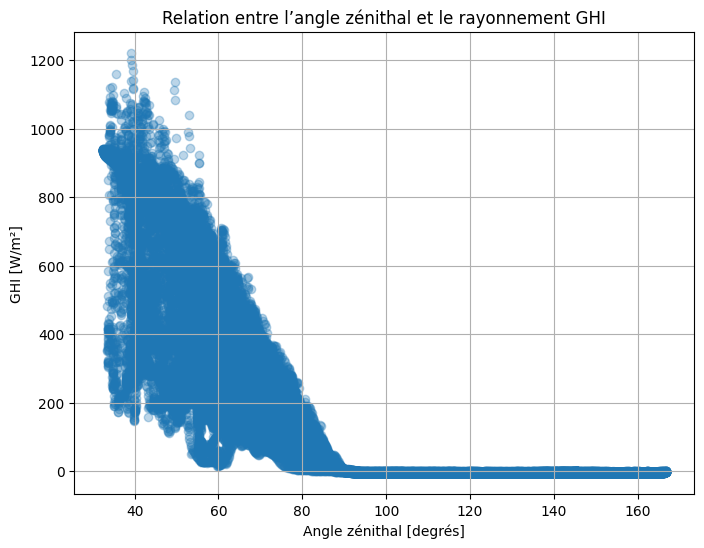

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_ref['Zenith Angle [degrees]'],
    df_ref['ghi'],
    alpha=0.3
)
plt.xlabel("Angle zénithal [degrés]")
plt.ylabel("GHI [W/m²]")
plt.title("Relation entre l’angle zénithal et le rayonnement GHI")
plt.grid(True)
plt.show()

**Observation du graphique**

Oui, on observe une tendance très marquée et structurée dans ce nuage de points.

Comportement remarquable

Lorsque l’angle zénithal est faible (soleil haut dans le ciel) :

le GHI est élevé.

Lorsque l’angle zénithal augmente (soleil plus bas sur l’horizon) :

le GHI diminue progressivement.

Pour des angles zénithaux proches de 90° :

le GHI est proche de zéro (lever ou coucher du soleil).

Le nuage de points forme ainsi une relation décroissante non linéaire.

**Explication physique**

Ce comportement est directement lié à la géométrie du rayonnement solaire :

Le rayonnement solaire incident sur une surface horizontale est proportionnel à

cos(𝜃𝑧) où 𝜃𝑧 est l’angle zénithal.

Lorsque le soleil est au zénith (angle faible), le flux reçu est maximal.

À mesure que l’angle zénithal augmente :

l’angle d’incidence devient moins favorable,

le trajet dans l’atmosphère est plus long,

l’absorption et la diffusion augmentent.

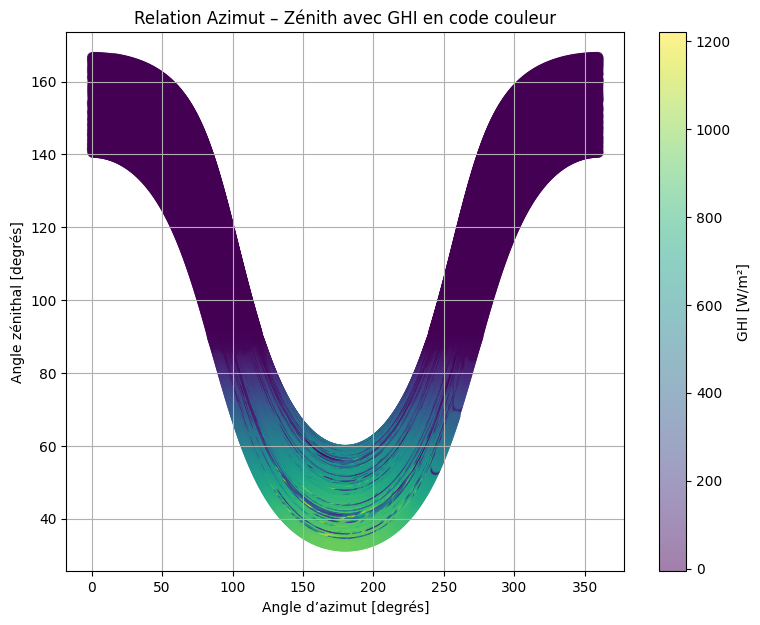

In [16]:
plt.figure(figsize=(9,7))
scatter = plt.scatter(
    df_ref['Azimuth Angle [degrees]'],
    df_ref['Zenith Angle [degrees]'],
    c=df_ref['ghi'],
    cmap='viridis',
    alpha=0.5
)

plt.xlabel("Angle d’azimut [degrés]")
plt.ylabel("Angle zénithal [degrés]")
plt.title("Relation Azimut – Zénith avec GHI en code couleur")
plt.colorbar(scatter, label="GHI [W/m²]")
plt.grid(True)
plt.show()

**Observation du graphique**

Oui, le résultat confirme clairement les conclusions précédentes concernant la relation entre GHI, l’angle d’azimut et l’angle zénithal.

Structure observée

Les valeurs élevées de GHI (couleurs claires / jaunes) sont concentrées :

pour des angles zénithaux faibles (soleil haut dans le ciel),

et pour des angles d’azimut correspondant au passage du soleil autour du midi solaire.

Lorsque l’angle zénithal augmente :

les points deviennent progressivement plus sombres (GHI plus faible),

indépendamment de l’azimut.

Pour des angles zénithaux proches de 90° :

le GHI est très faible, quelle que soit la valeur de l’azimut.

**Justification et interprétation**

Ce graphique met en évidence que :

L’angle zénithal est le facteur dominant pour expliquer l’intensité du GHI :

un faible angle zénithal est systématiquement associé à un GHI élevé.

L’angle d’azimut joue un rôle secondaire :

il structure la répartition des points (cycle est–sud–ouest),

mais n’explique pas à lui seul les fortes variations de GHI.

Le code couleur confirme visuellement que :

le maximum de GHI est atteint lorsque le soleil est haut dans le ciel et bien orienté.

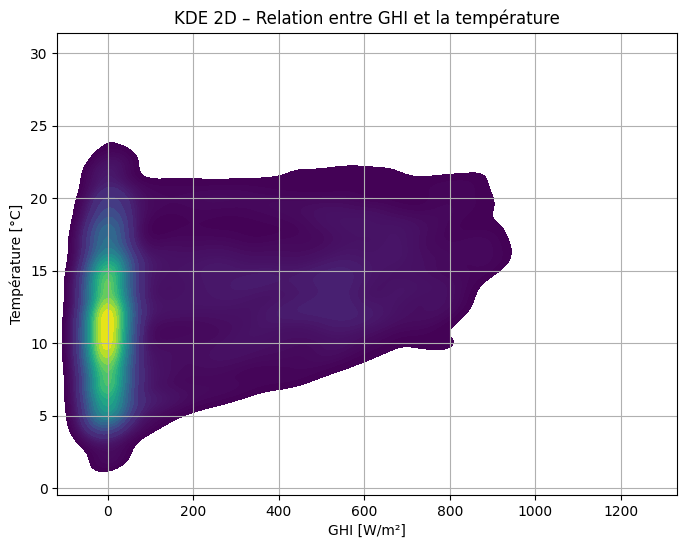

In [17]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df_ref['ghi'],
    y=df_ref['temp'],
    fill=True,
    cmap='viridis',
    levels=30,
    thresh=0.05
)
plt.xlabel("GHI [W/m²]")
plt.ylabel("Température [°C]")
plt.title("KDE 2D – Relation entre GHI et la température")
plt.grid(True)
plt.show()

**Interprétation**

La zone de densité maximale (couleurs claires) montre que :

les fortes valeurs de GHI sont majoritairement associées à des températures plus élevées,

les faibles valeurs de GHI correspondent à une large plage de températures, souvent plus basses.

La forme allongée de la densité indique une relation positive mais non parfaitement linéaire.

 Conclusion :
Il existe une corrélation positive claire entre le rayonnement solaire et la température, ce qui est cohérent physiquement : une augmentation de l’ensoleillement favorise le réchauffement de l’air, même si d’autres facteurs (vent, humidité, saison) interviennent.

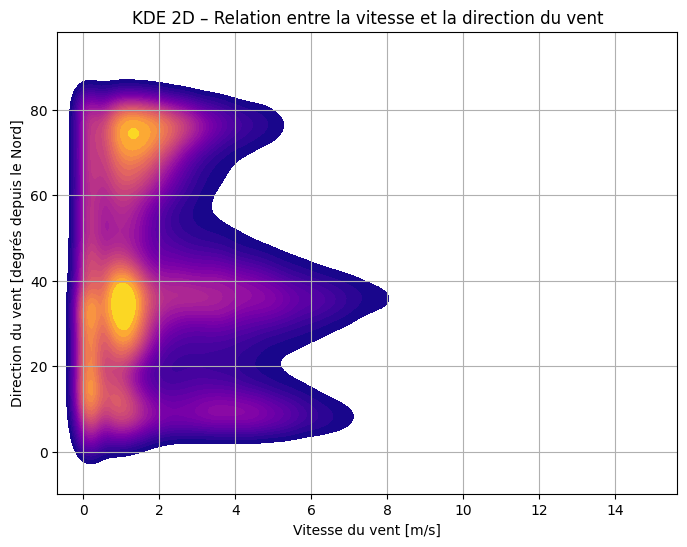

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df_ref['Avg Wind Speed @ 30ft [m/s]'],
    y=df_ref['Avg Wind Direction @ 30ft [deg from N]'],
    fill=True,
    cmap='plasma',
    levels=30,
    thresh=0.05
)
plt.xlabel("Vitesse du vent [m/s]")
plt.ylabel("Direction du vent [degrés depuis le Nord]")
plt.title("KDE 2D – Relation entre la vitesse et la direction du vent")
plt.grid(True)
plt.show()

**Interprétation**

La densité est concentrée sur certaines directions préférentielles, indiquant des régimes de vent dominants.

La vitesse du vent reste globalement répartie sur une plage similaire quelle que soit la direction.

Aucune structure diagonale marquée n’apparaît.

Conclusion :

Il n’existe pas de relation forte entre la vitesse et la direction du vent.

Ces deux variables sont largement indépendantes, ce qui explique leur faible corrélation observée précédemment.

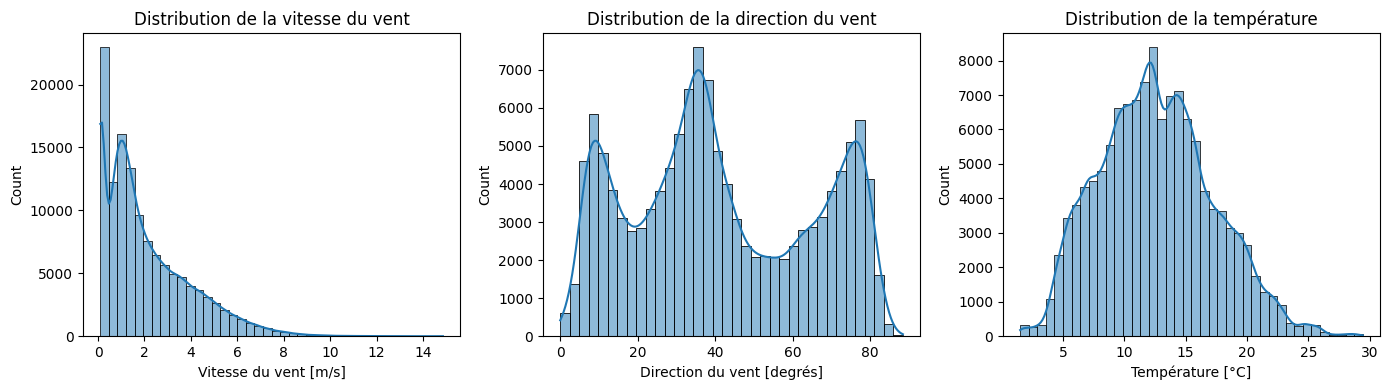

In [19]:
plt.figure(figsize=(14,4))

# Vitesse du vent
plt.subplot(1, 3, 1)
sns.histplot(df_ref['Avg Wind Speed @ 30ft [m/s]'], bins=40, kde=True)
plt.title("Distribution de la vitesse du vent")
plt.xlabel("Vitesse du vent [m/s]")

# Direction du vent
plt.subplot(1, 3, 2)
sns.histplot(df_ref['Avg Wind Direction @ 30ft [deg from N]'], bins=36, kde=True)
plt.title("Distribution de la direction du vent")
plt.xlabel("Direction du vent [degrés]")

# Température
plt.subplot(1, 3, 3)
sns.histplot(df_ref['temp'], bins=40, kde=True)
plt.title("Distribution de la température")
plt.xlabel("Température [°C]")

plt.tight_layout()
plt.show()

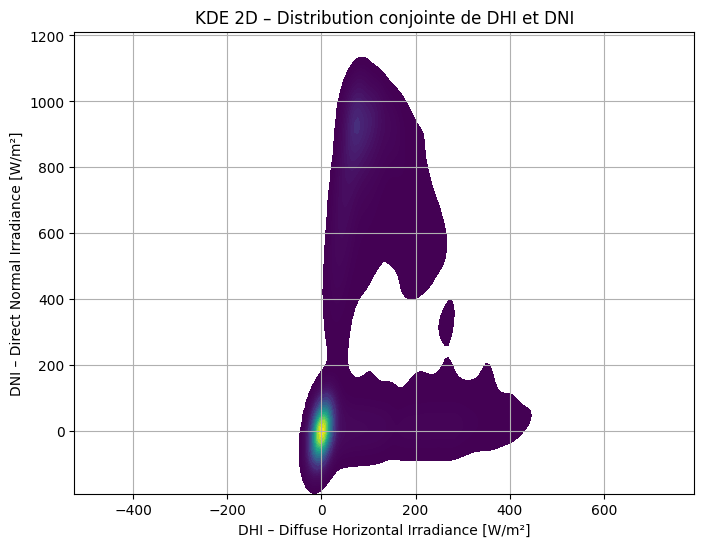

In [20]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df_ref['dhi'],
    y=df_ref['dni'],
    fill=True,
    cmap='viridis',
    levels=30,
    thresh=0.05
)
plt.xlabel("DHI – Diffuse Horizontal Irradiance [W/m²]")
plt.ylabel("DNI – Direct Normal Irradiance [W/m²]")
plt.title("KDE 2D – Distribution conjointe de DHI et DNI")
plt.grid(True)
plt.show()

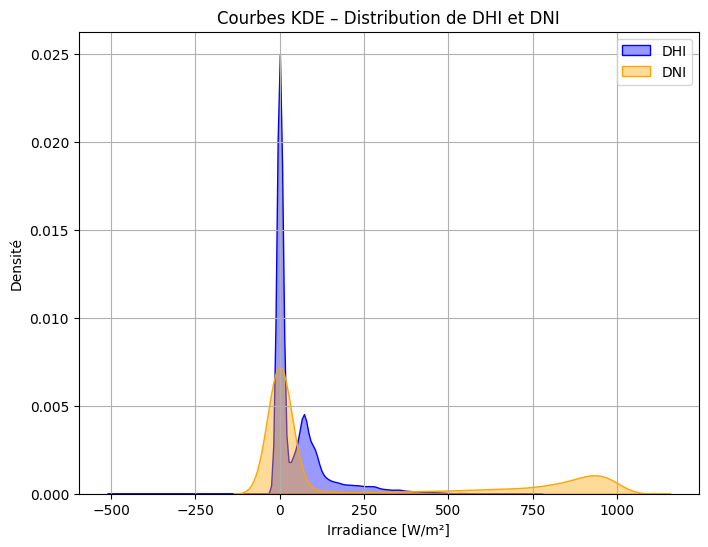

In [21]:

plt.figure(figsize=(8,6))

# KDE pour DHI
sns.kdeplot(df_ref['dhi'], label='DHI', fill=True, alpha=0.4, color='blue')

# KDE pour DNI
sns.kdeplot(df_ref['dni'], label='DNI', fill=True, alpha=0.4, color='orange')

plt.xlabel("Irradiance [W/m²]")
plt.ylabel("Densité")
plt.title("Courbes KDE – Distribution de DHI et DNI")
plt.legend()
plt.grid(True)
plt.show()

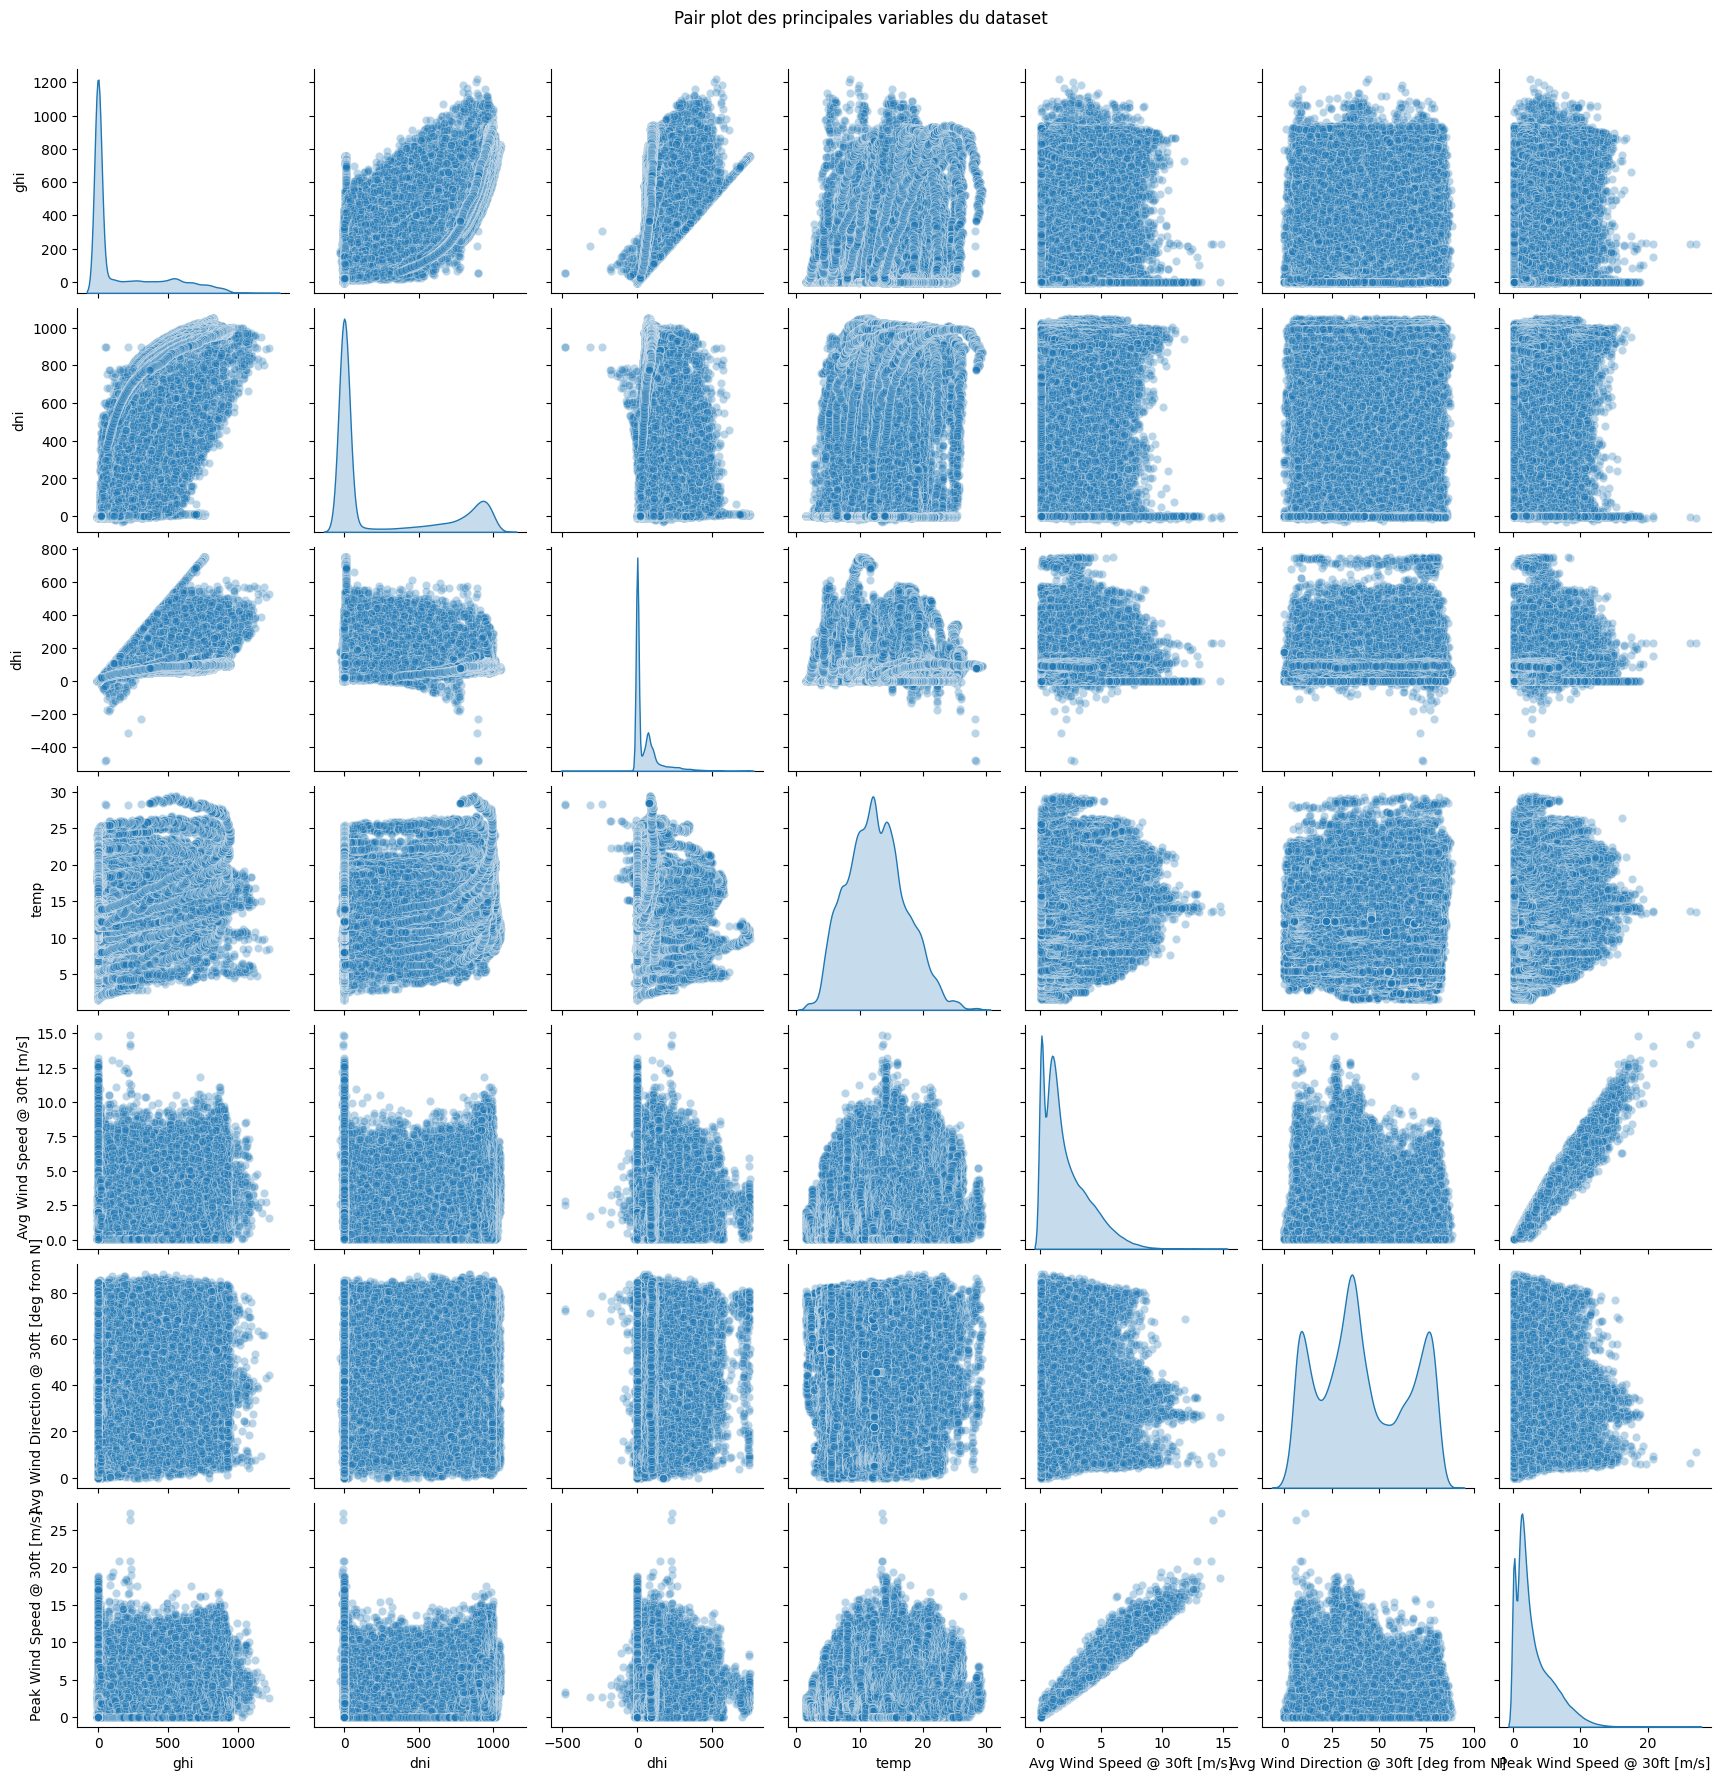

In [22]:
# Sélectionner les principales variables numériques pour la visualisation
variables = ['ghi', 'dni', 'dhi', 'temp', 'Avg Wind Speed @ 30ft [m/s]',
             'Avg Wind Direction @ 30ft [deg from N]', 'Peak Wind Speed @ 30ft [m/s]']

# Création du pair plot
sns.pairplot(df_ref[variables], diag_kind='kde', plot_kws={'alpha':0.3})
plt.suptitle("Pair plot des principales variables du dataset", y=1.02)
plt.show()

**Observations générales**

Relations fortes entre variables solaires :

GHI ↔ DNI ↔ DHI : les scatter plots montrent une relation positive forte, surtout entre GHI et DNI/DHI.

Ces relations confirment les corrélations observées précédemment dans la matrice de corrélation.


Variables du vent :

Vitesse et direction du vent : les scatter plots montrent peu ou pas de corrélation avec les variables solaires ou la température.

Les distributions sont plus dispersées et indépendantes des autres variables.

Distribution des variables :

Les diagonales montrent les densités KDE pour chaque variable.

GHI, DNI, DHI : distributions souvent asymétriques, avec des pics à faible valeurs (nuages/nuit) et longue queue vers les valeurs élevées (journées ensoleillées).

Vitesse du vent : distribution légèrement asymétrique.

Température : distribution quasi-normale mais parfois avec des queues plus étendues selon la saison.

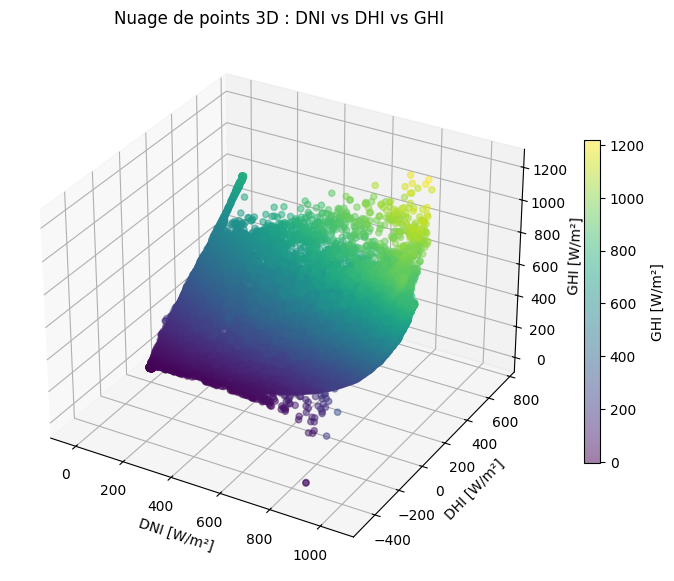

In [23]:
# Variables à utiliser
x = df_ref['dni']
y = df_ref['dhi']
z = df_ref['ghi']

# Création de la figure 3D
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points
sc = ax.scatter3D(x, y, z, c=z, cmap='viridis', alpha=0.5)

# Labels et titre
ax.set_xlabel("DNI [W/m²]")
ax.set_ylabel("DHI [W/m²]")
ax.set_zlabel("GHI [W/m²]")
ax.set_title("Nuage de points 3D : DNI vs DHI vs GHI")

# Barre de couleur
cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label("GHI [W/m²]")

plt.show()

**Observations du nuage de points 3D**

Relation entre les trois variables :

Les points forment une surface inclinée plutôt qu’un nuage totalement dispersé.

Lorsque DNI et DHI augmentent, GHI augmente également, ce qui est logique car :

GHI=DNI⋅cos(𝜃)+DHI

(avec 𝜃 l’angle zénithal du soleil).

Comportement physique :

DNI élevé → GHI élevé, surtout si DHI est modéré.

DHI élevé → GHI élevé, même si DNI est faible (nuages diffusant la lumière).

Les combinaisons DNI faible / DHI faible → GHI faible correspondent aux périodes nocturnes ou très nuageuses.

Structure générale :

Le nuage montre une relation positive globale entre les trois composantes.

Le nuage n’est pas parfaitement linéaire : l’influence de l’angle zénithal et de la diffusion atmosphérique crée un pattern tridimensionnel incliné.

**Time-aware vs Time-naive dans Pandas**

Time-naive (non localisé)
--
Un index de type DatetimeIndex sans information de fuseau horaire.

Pandas considère que les dates/horaires sont “neutres”, sans lien avec un fuseau horaire.

Exemples : 2021-01-01 12:00:00

Limitation : impossible de gérer correctement les conversions entre fuseaux horaires ou les calculs liés à l’heure locale.

Time-aware (localisé)
--

Un DatetimeIndex qui connaît le fuseau horaire (tz-aware).

Exemples : 2021-01-01 12:00:00-08:00 (heure locale PST)

Avantages :

Rééchantillonnage respectant la timezone

Calcul correct des périodes lors de transitions heure d’été/hiver

Comparaisons temporelles fiables entre différentes zones

In [24]:
df_ref.index = pd.to_datetime(df_ref.index)

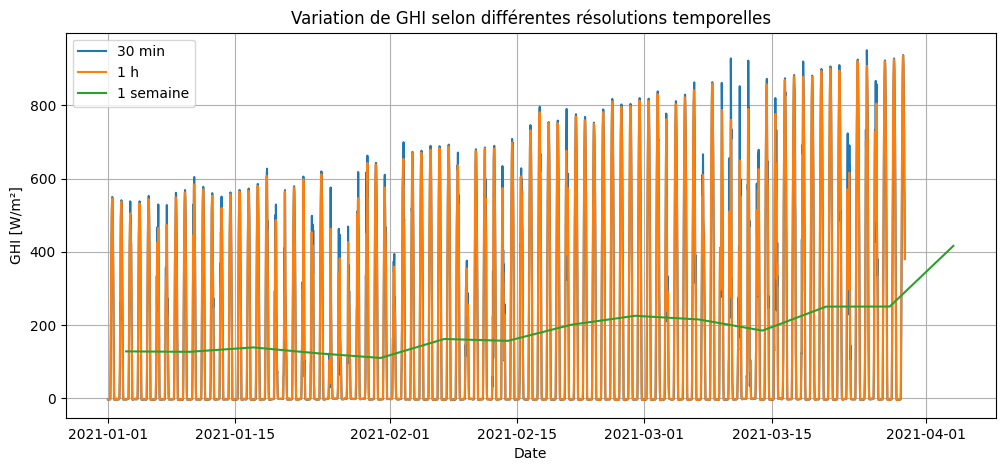

In [27]:
# 30 minutes
ghi_30min = df_ref['ghi'].resample('30min').mean()

# 1 heure
ghi_1h = df_ref['ghi'].resample('1h').mean()

# 1 semaine
ghi_1w = df_ref['ghi'].resample('1W').mean()

# Tracer les trois courbes
plt.figure(figsize=(12,5))
plt.plot(ghi_30min, label='30 min')
plt.plot(ghi_1h, label='1 h')
plt.plot(ghi_1w, label='1 semaine')
plt.xlabel("Date")
plt.ylabel("GHI [W/m²]")
plt.title("Variation de GHI selon différentes résolutions temporelles")
plt.legend()
plt.grid(True)
plt.show()

**Observation / Conclusion**

Résolution plus fine (30 min, 1 h) : capture les variations journalières et les pics de GHI pendant la journée.

Résolution hebdomadaire : lisse les fluctuations, ne montre que la tendance générale sur plusieurs jours.

Conclusion : Le choix de la résolution dépend de l’objectif :

Modélisation horaire → 30 min / 1 h

Étude de tendance saisonnière → 1 semaine ou plus

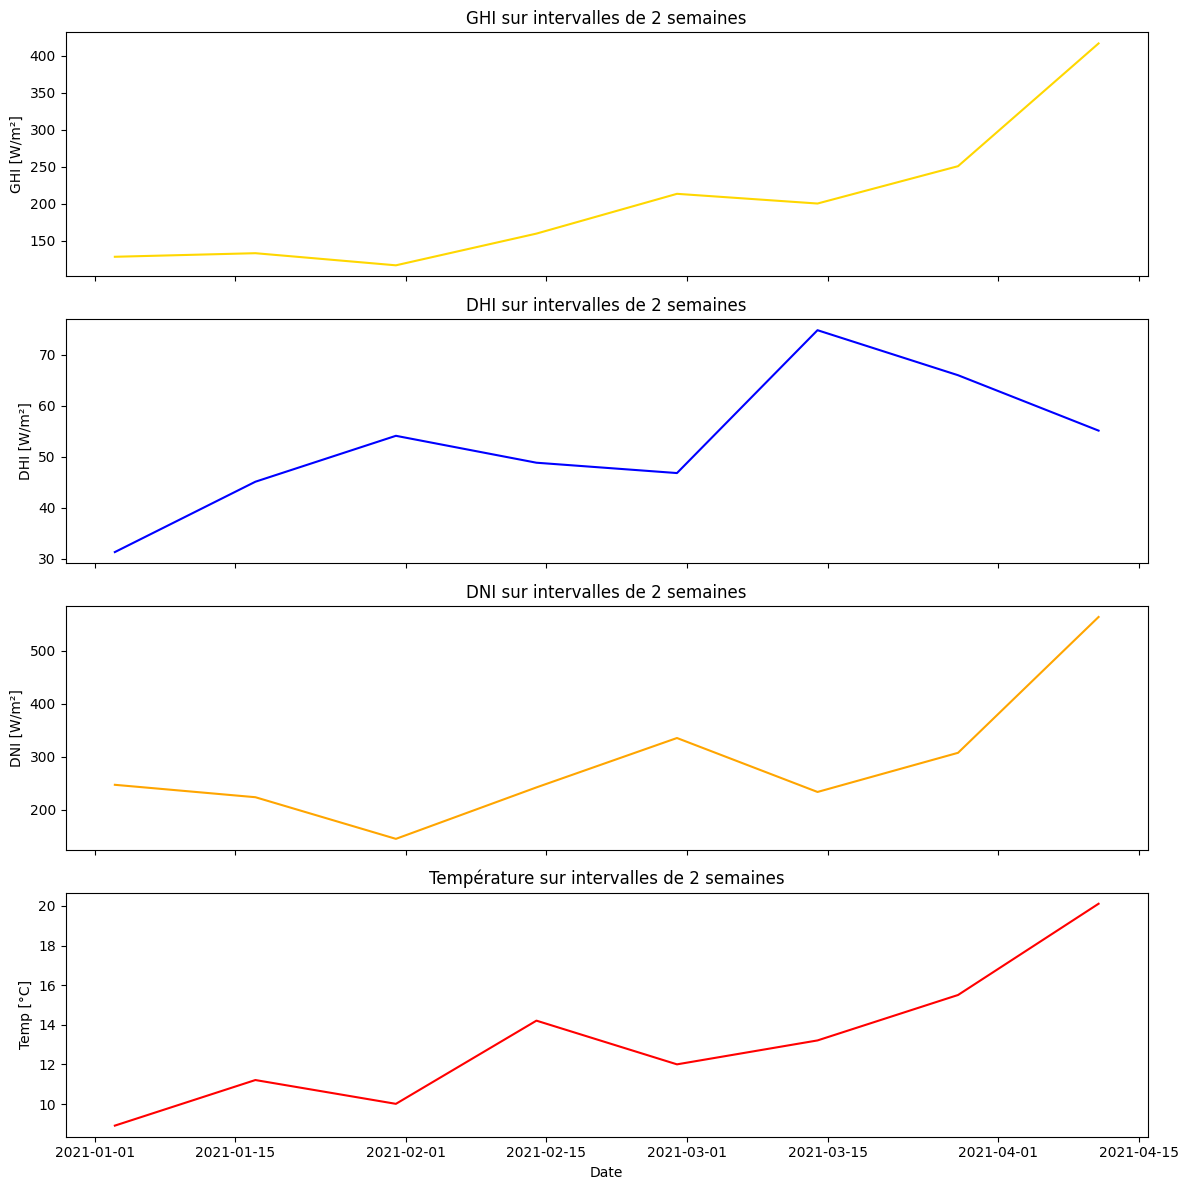

In [28]:
# Rééchantillonnage sur 2 semaines
ghi_2w = df_ref['ghi'].resample('2W').mean()
dhi_2w = df_ref['dhi'].resample('2W').mean()
dni_2w = df_ref['dni'].resample('2W').mean()
temp_2w = df_ref['temp'].resample('2W').mean()

# Création des subplots
fig, axs = plt.subplots(4, 1, figsize=(12,12), sharex=True)

axs[0].plot(ghi_2w, color='gold')
axs[0].set_ylabel("GHI [W/m²]")
axs[0].set_title("GHI sur intervalles de 2 semaines")

axs[1].plot(dhi_2w, color='blue')
axs[1].set_ylabel("DHI [W/m²]")
axs[1].set_title("DHI sur intervalles de 2 semaines")

axs[2].plot(dni_2w, color='orange')
axs[2].set_ylabel("DNI [W/m²]")
axs[2].set_title("DNI sur intervalles de 2 semaines")

axs[3].plot(temp_2w, color='red')
axs[3].set_ylabel("Temp [°C]")
axs[3].set_title("Température sur intervalles de 2 semaines")
axs[3].set_xlabel("Date")

plt.tight_layout()
plt.show()

**Observation / Conclusion**

Les courbes lissées sur 2 semaines montrent les tendances générales :

GHI, DNI et DHI suivent la variation saisonnière et journalière moyenne, les pics quotidiens disparaissent.

La température suit également une tendance similaire à GHI, confirmant la relation positive entre rayonnement solaire et température.

Le rééchantillonnage est utile pour :

Analyser des tendances longues (tendance saisonnière)

Éliminer le bruit lié aux variations horaires ou journalières